# Regression with an Insurance Dataset

<img src="https://storage.googleapis.com/kaggle-datasets-images/5547076/9178166/bac551e135c6550a13bd5d143a01c4e5/dataset-cover.jpg?t=2024-08-15-09-55-47" width="800">

The goal is to predict individual insurance premiums (Premium Amount) from demographic, lifestyle, and policy-related features. The dataset comes from a Kaggle Playground Series competition.

---

### Features (input)  
- **Age** : Customer’s age (years).  
- **Gender** : Female / Male.  
- **Annual Income** : Yearly income (numeric).  
- **Marital Status** : Single / Married / Divorced, etc.  
- **Number of Dependents** : Count of financially dependent people.  
- **Education Level** : Highest completed education (e.g., High School, Bachelor’s, Master’s).  
- **Occupation** : Job category (e.g., Self-Employed, Private, Government).  
- **Health Score** : Composite health indicator (higher → better health).  
- **Location** : Residential area (Urban / Suburban / Rural).  
- **Policy Type** : Insurance policy category (e.g., Premium, Comprehensive, …).  
- **Previous Claims** : Number of historical insurance claims.  
- **Vehicle Age** : Age of the insured vehicle (years).  
- **Credit Score** : Creditworthiness score.  
- **Insurance Duration** : Policy tenure/years insured.  
- **Policy Start Date** : Start date of the current policy.  
- **Customer Feedback** : Service satisfaction label (e.g., Poor/Average/Good).  
- **Smoking Status** : Yes / No.  
- **Exercise Frequency** : Activity frequency (Weekly / Monthly / …).  
- **Property Type** : Residence type (House / Apartment / …).
### Target (output)  
- **Premium Amount** : Continuous value to be predicted.

The dataset was taken from Kaggle: 
[Kaggle | Regression with an Insurance Dataset](https://www.kaggle.com/competitions/playground-series-s4e12/overview)

## Data Read

In [1]:
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## EDA - Exploratory Data Analysis

In [3]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
train.tail()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0
1199999,1199999,21.0,Female,NaN,Divorced,0.0,PhD,NaN,10.125323,Rural,Premium,0.0,18.0,502.0,6.0,2020-08-26 15:21:39.155231,Good,Yes,Monthly,House,2480.0


In [5]:
train.sample(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
943588,943588,42.0,Male,15251.0,Married,2.0,High School,NaN,38.797510,Rural,Basic,3.0,13.0,311.0,2.0,2020-04-11 15:21:39.117183,Poor,No,Daily,House,34.0
1043047,1043047,48.0,Female,50945.0,Married,NaN,Master's,Self-Employed,33.083454,Suburban,Premium,0.0,12.0,391.0,7.0,2021-10-11 15:21:39.222387,Poor,Yes,Rarely,House,1494.0
978415,978415,61.0,Male,15774.0,Single,1.0,PhD,NaN,27.716058,Suburban,Comprehensive,0.0,5.0,585.0,6.0,2023-05-24 15:21:39.172097,Average,Yes,Monthly,Apartment,1770.0
816728,816728,37.0,Female,27950.0,Divorced,1.0,Master's,Self-Employed,NaN,Rural,Comprehensive,0.0,15.0,554.0,1.0,2019-08-19 15:21:39.112553,Good,Yes,Weekly,Condo,35.0
112105,112105,23.0,Male,82696.0,Single,3.0,PhD,Employed,16.410521,Rural,Comprehensive,1.0,7.0,524.0,2.0,2020-01-21 15:21:39.106582,Average,Yes,Weekly,House,101.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [7]:
train.shape

(1200000, 21)

In [8]:
train.isna().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [9]:
(train.isna().mean()*100).round(2)

id                       0.00
Age                      1.56
Gender                   0.00
Annual Income            3.75
Marital Status           1.54
Number of Dependents     9.14
Education Level          0.00
Occupation              29.84
Health Score             6.17
Location                 0.00
Policy Type              0.00
Previous Claims         30.34
Vehicle Age              0.00
Credit Score            11.49
Insurance Duration       0.00
Policy Start Date        0.00
Customer Feedback        6.49
Smoking Status           0.00
Exercise Frequency       0.00
Property Type            0.00
Premium Amount           0.00
dtype: float64

In [10]:
train.drop(columns=['id', 'Policy Start Date','Occupation',"Previous Claims"], inplace=True)
test.drop(columns=['id', 'Policy Start Date','Occupation',"Previous Claims"], inplace=True)

In [11]:
train.isnull().sum()

Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Health Score             74076
Location                     0
Policy Type                  0
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [12]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Annual Income'] = train['Annual Income'].fillna(train['Annual Income'].median())
train['Marital Status'] = train['Marital Status'].fillna(train['Marital Status'].mode()[0])
train['Customer Feedback'] = train['Customer Feedback'].fillna('Not Available')
train['Health Score'] = train['Health Score'].interpolate(method='linear')
train['Vehicle Age'] = train['Vehicle Age'].fillna(train['Vehicle Age'].median())
train['Insurance Duration'] = train['Insurance Duration'].fillna(train['Insurance Duration'].median())
train['Credit Score'] = train['Credit Score'].fillna(train['Credit Score'].median())
train['Number of Dependents'] = train['Number of Dependents'].fillna(train['Number of Dependents'].median())

In [13]:
train.isnull().sum()

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Health Score            0
Location                0
Policy Type             0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [14]:
train.describe()

,Age,Annual Income,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,4.114329e+01,3.241431e+04,2.009026e+00,2.561697e+01,9.569891e+00,5.931628e+02,5.018219e+00,1.102545e+03
std,1.343402e+01,3.161560e+04,1.351022e+00,1.201602e+01,5.776174e+00,1.411041e+02,2.594330e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.646000e+03,1.000000e+00,1.608546e+01,5.000000e+00,4.840000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.466251e+01,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.393600e+04,3.000000e+00,3.419437e+01,1.500000e+01,7.060000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [15]:
train.corr(numeric_only=True)

,Age,Annual Income,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
Age,1.000000,0.000061,0.001399,0.001175,-0.002436,0.002661,-0.000062,-0.002410
Annual Income,0.000061,1.000000,0.001920,0.022686,-0.000438,-0.181180,0.000383,-0.009989
Number of Dependents,0.001399,0.001920,1.000000,0.004583,0.001170,-0.001525,-0.000252,-0.000947
Health Score,0.001175,0.022686,0.004583,1.000000,0.000220,0.011123,0.002624,0.014390
Vehicle Age,-0.002436,-0.000438,0.001170,0.000220,1.000000,0.000470,0.003132,0.000391
Credit Score,0.002661,-0.181180,-0.001525,0.011123,0.000470,1.000000,0.000446,-0.024471
Insurance Duration,-0.000062,0.000383,-0.000252,0.002624,0.003132,0.000446,1.000000,-0.000028
Premium Amount,-0.002410,-0.009989,-0.000947,0.014390,0.000391,-0.024471,-0.000028,1.000000


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

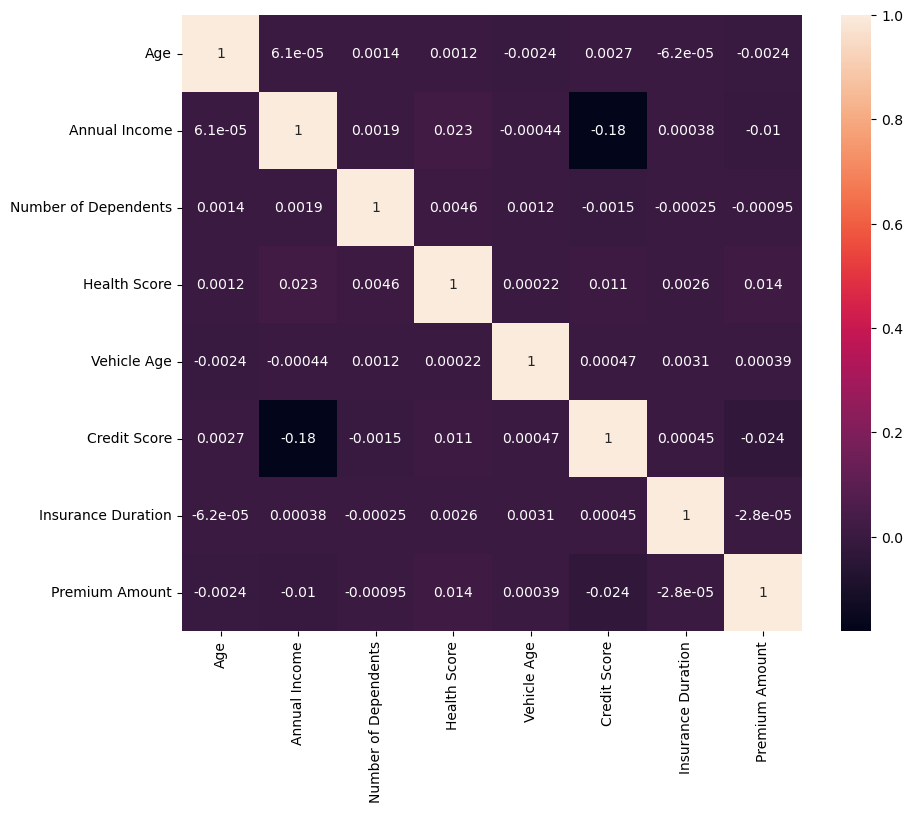

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True)

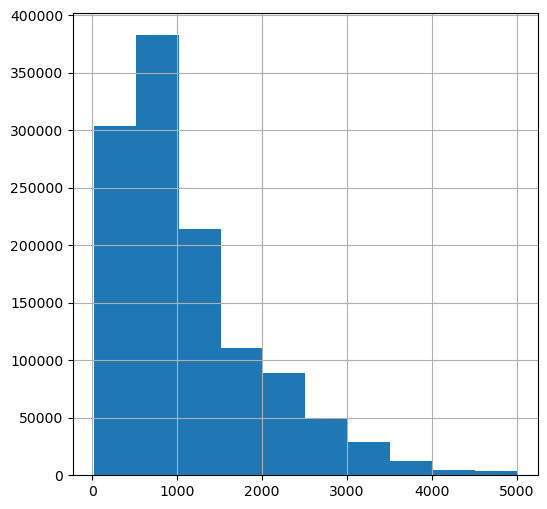

In [18]:
train["Premium Amount"].hist(figsize=(6,6));

<Axes: xlabel='Premium Amount', ylabel='Count'>

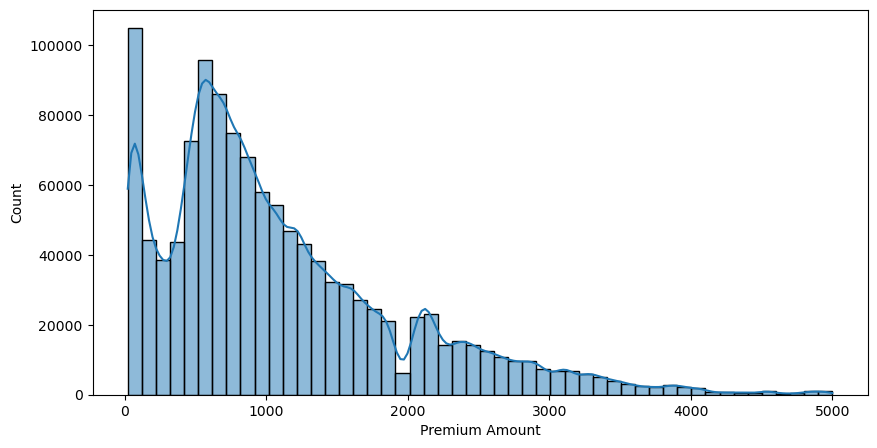

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(data=train, x='Premium Amount',  bins=50, kde=True)

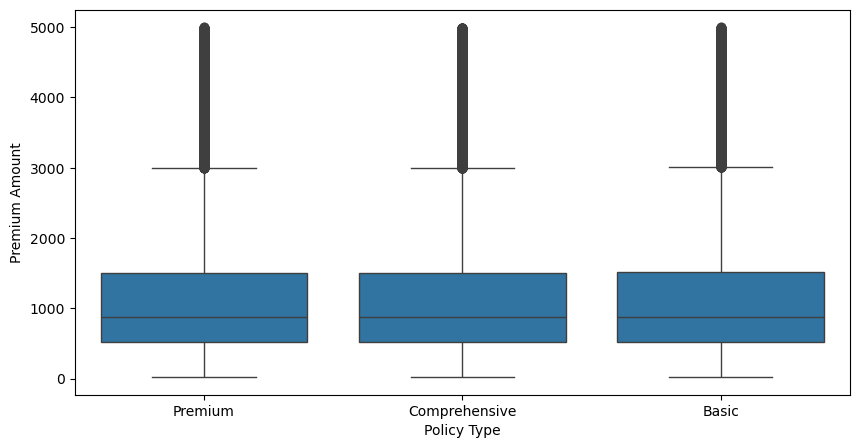

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x='Policy Type', y='Premium Amount')
plt.show()

<Axes: xlabel='Number of Dependents', ylabel='count'>

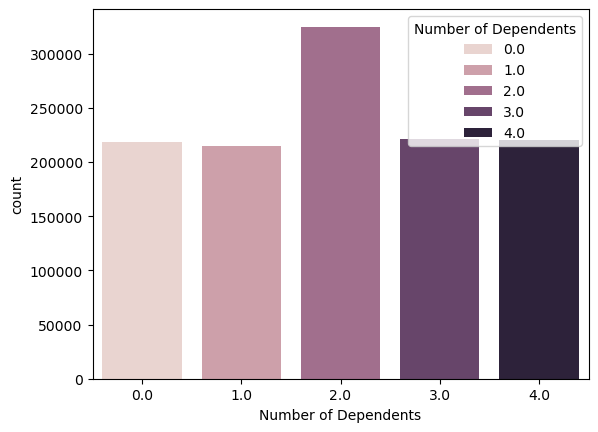

In [21]:
sns.countplot(x=train['Number of Dependents'],hue=train['Number of Dependents'])

In [22]:
abs(train.corr(numeric_only=True)['Premium Amount'].sort_values(ascending=False))

Premium Amount          1.000000
Health Score            0.014390
Vehicle Age             0.000391
Insurance Duration      0.000028
Number of Dependents    0.000947
Age                     0.002410
Annual Income           0.009989
Credit Score            0.024471
Name: Premium Amount, dtype: float64

## Modelling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [24]:
x = train.drop(['Premium Amount'],axis=1)
y = train[['Premium Amount']]

In [25]:
x=pd.get_dummies(x,drop_first=True)

In [26]:
x.head()

,Age,Annual Income,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Not Available,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,19.0,10049.0,1.0,22.598761,17.0,372.0,5.0,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,True
1,39.0,31678.0,3.0,15.569731,12.0,694.0,2.0,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,True
2,23.0,25602.0,3.0,47.177549,14.0,595.0,3.0,True,False,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,True
3,21.0,141855.0,2.0,10.938144,0.0,367.0,1.0,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,21.0,39651.0,1.0,20.376094,8.0,598.0,4.0,True,False,True,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False,True


In [27]:
x=MinMaxScaler().fit_transform(x)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [30]:
model=GradientBoostingRegressor()

In [31]:
model.fit(x_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [34]:
tahmin = model.predict(x_test)

In [35]:
mean_squared_error(y_test,tahmin) **.5

858.0486577764372

In [36]:
r2_score(y_test,tahmin)

0.014770908495195134

In [37]:
mean_absolute_error(y_test,tahmin)

661.9591058318866

## Conclusion 

In this study, the GradientBoostingRegressor model was used to predict the Premium Amount, with the data split into 80% training and 20% testing. On the test set, the model achieved RMSE of 858.049, MAE of 661.959, and an R² of 0.0148.